#### 4 Redes neuronales convolucionales

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5362917667677491480
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 997233062183631485
physical_device_desc: "device: XLA_CPU device"
]


cargamos datos

In [3]:
import keras
from keras.datasets import mnist
#cargamos datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

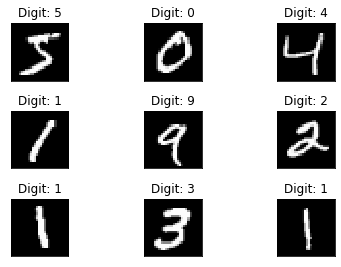

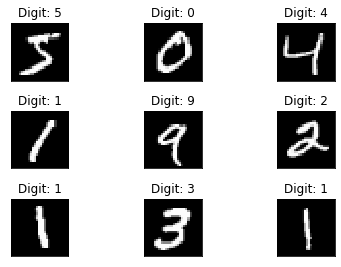

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

Preparamos los datos

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

(img_train, lab_train), (img_test, lab_test) = mnist.load_data()

print (img_train.shape)
img_train = img_train.reshape((60000, 28, 28, 1))
img_train = img_train.astype('float32') / 255

img_test = img_test.reshape((10000, 28, 28, 1))
img_test = img_test.astype('float32') / 255

lab_train = to_categorical(lab_train)
lab_test = to_categorical(lab_test)

(60000, 28, 28)


preparamos un modelo de CNN

In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

#Adaptive learning rate (adaDelta) funciona muy bien en CNN rivalizando con adam y adagrad
#la función de pérdida para clasificación categorical crossentropy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

ahora a entrenar ufff

In [8]:
batch_size = 128
num_epoch = 10

model_log = model.fit(img_train, lab_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(img_test, lab_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.2752 - accuracy: 0.9152 - val_loss: 0.0720 - val_accuracy: 0.9781
Epoch 2/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0909 - accuracy: 0.9725 - val_loss: 0.0418 - val_accuracy: 0.9852
Epoch 3/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0671 - accuracy: 0.9802 - val_loss: 0.0369 - val_accuracy: 0.9872
Epoch 4/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0545 - accuracy: 0.9837 - val_loss: 0.0298 - val_accuracy: 0.9894
Epoch 5/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0308 - val_accuracy: 0.9903
Epoch 6/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0418 - accuracy: 0.9875 - val_loss: 0.0330 - val_accuracy: 0.9889
Epoch 7/10
60000/60000 [==============================] - 86s 1ms/st

veamos metricas

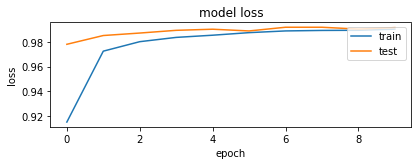

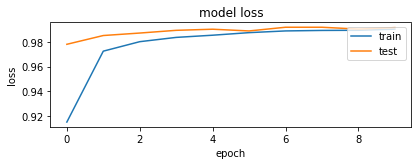

In [9]:


import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

guardamos el modelo

In [10]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk
